### 이미지 파일(.jpg) 읽고 화면에 출력하는 코드

- from PIL import Image : JPG, PNG 등 이미지 파일을 읽기 위해 Pillow 라이브러리를 가져옴

원하는 이미지만 선택해서 소규모 다운로드


https://www.pexels.com/ko-kr/search/dog/

https://www.pexels.com/ko-kr/search/cat/

모두 수십 장만 다운로드해 실습하기에 딱 좋은 곳

In [8]:
%pip install pillow

Note: you may need to restart the kernel to use updated packages.


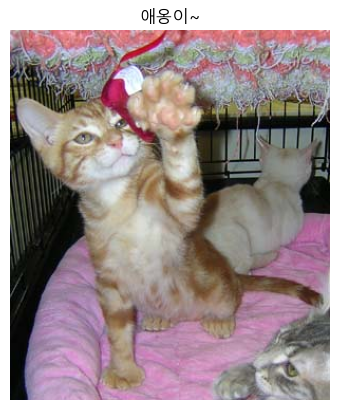

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 지정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows에서 '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

# 1) 이미지 파일 경로 지정
file_path = "data/weather_data/images/dog_cat/Cat/8102.jpg"   # 출력할 JPG 파일 이름 또는 경로

# 2) JPG 파일을 읽어서 이미지 객체 생성
img = Image.open(file_path)

# 3) 화면에 이미지 출력
plt.imshow(img)
plt.axis("off")  # 축(숫자 눈금) 숨기기
plt.title("애옹이~")  # 이미지 제목 지정
plt.show()


In [5]:
%pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   --------- ------------------------------ 2.1/8.7 MB 10.7 MB/s eta 0:00:01
   -------------------- ------------------- 4.5/8.7 MB 11.2 MB/s eta 0:00:01
   -------------------------------- ------- 7.1/8.7 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 11.1 MB/s  0:00:00
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   - -------------------------------------- 1.3/38.6 MB 6.1 MB/s eta 0:00:07
   -- ------------------------------------- 2.4/38.6 MB 5.8 MB/s eta 0:00:07
   ---- ----------------------------------- 3.9/38.6 MB 6.3 MB/s eta 0:00:06
   ----- ---------------------------------- 5.8/38.6 MB 6.9 MB/s eta 0:00:05
   ------- -------------------------------- 7.6/38.6 MB 7.3 MB/s eta 0:00:05
   ---------- ----------------------------- 9.7/38.6 MB 7.8 MB/s eta 0:00:04
   ----------- ---------------------------- 10.7/38.6 MB 7.7 MB/s eta 0:00:04
   ----------- -

총 로드된 이미지 수: 49장
Train = 39장, Test = 10장

=== TRAIN DATASET 상위 5개 ===
Image(path=data/weather_data/images/dog_cat/Dog\8112.jpg)
Image(path=data/weather_data/images/dog_cat/Dog\8104.jpg)
Image(path=data/weather_data/images/dog_cat/Dog\8134.jpg)
Image(path=data/weather_data/images/dog_cat/Dog\8108.jpg)
Image(path=data/weather_data/images/dog_cat/Dog\8103.jpg)


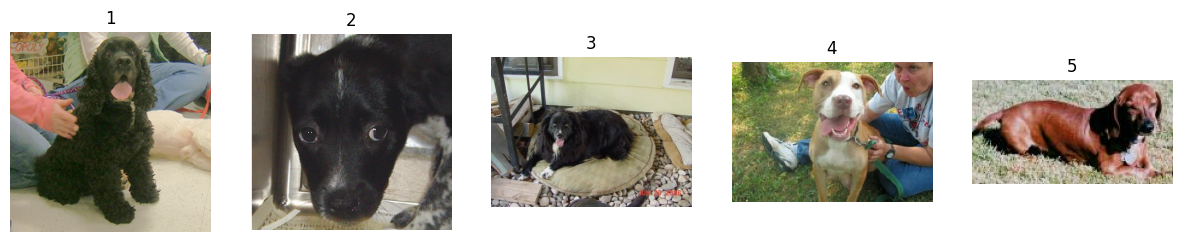


=== TEST DATASET 상위 5개 ===
Image(path=data/weather_data/images/dog_cat/Dog\8113.jpg)
Image(path=data/weather_data/images/dog_cat/Dog\8145.jpg)
Image(path=data/weather_data/images/dog_cat/Dog\8147.jpg)
Image(path=data/weather_data/images/dog_cat/Dog\8144.jpg)
Image(path=data/weather_data/images/dog_cat/Dog\8117.jpg)


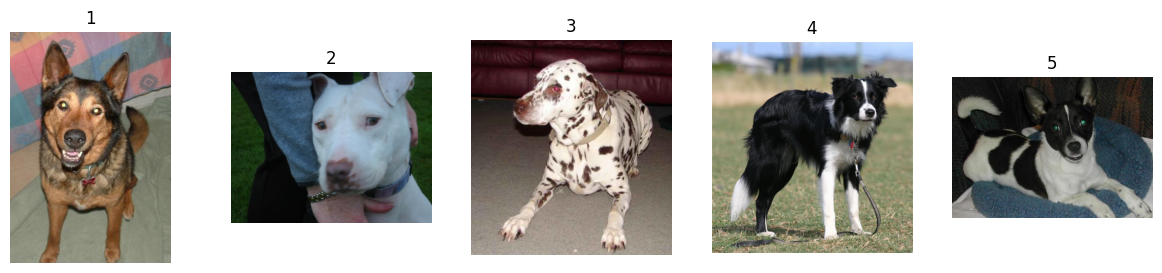

In [7]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# ------------------------------
# 1) 이미지 객체 클래스 정의
# ------------------------------
class ImageData:
    def __init__(self, file_path):
        self.file_path = file_path
        self.image = Image.open(file_path)     # PIL 이미지 객체 로드

    def __str__(self):
        return f"Image(path={self.file_path})"


# ------------------------------
# 2) 이미지 파일 읽어서 객체 리스트 생성
# ------------------------------
image_dir = "data/weather_data/images/dog_cat/Dog"  # 이미지들이 들어 있는 폴더 (예: images/ 폴더에 jpg 100장)
image_list = []

for filename in os.listdir(image_dir):
    if filename.lower().endswith(".jpg"):
        full_path = os.path.join(image_dir, filename)
        image_list.append(ImageData(full_path))

print(f"총 로드된 이미지 수: {len(image_list)}장")


# ------------------------------
# 3) Train : Test = 8 : 2 분리
# ------------------------------
train_set, test_set = train_test_split(
    image_list,
    test_size=0.2,
    shuffle=True,
    random_state=42
)

print(f"Train = {len(train_set)}장, Test = {len(test_set)}장")


# ------------------------------
# 4) Train / Test 각 5개씩 화면에 출력
# ------------------------------
def show_head(dataset, title):
    print(f"\n=== {title} 상위 5개 ===")
    for obj in dataset[:5]:
        print(obj)     # __str__() 실행
    # 실제 이미지 표시
    fig, ax = plt.subplots(1, len(dataset[:5]), figsize=(15, 3))
    for i, obj in enumerate(dataset[:5]):
        ax[i].imshow(obj.image)
        ax[i].axis("off")
        ax[i].set_title(f"{i+1}")
    plt.show()


show_head(train_set, "TRAIN DATASET")
show_head(test_set, "TEST DATASET")


### 실습과제: 개 고양이를 섞어서 8:2로 나누어 출력하기

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# ------------------------------
# 1) 이미지 객체 클래스 정의
# ------------------------------
class ImageData:
    def __init__(self, file_path, label):
        self.file_path = file_path
        self.image = Image.open(file_path)     # PIL 이미지 객체 로드
        self.label = label

    def __str__(self):
        return f"Image(path={self.file_path}, label={self.label})"


# ------------------------------
# 2) 이미지 파일 읽어서 객체 리스트 생성
# ------------------------------
image_dir = "data/weather_data/images/dog_cat/Dog"  # 이미지들이 들어 있는 폴더 (예: images/ 폴더에 jpg 100장)
image_list = []

for filename in os.listdir(image_dir):
    if filename.lower().endswith(".jpg"):
        full_path = os.path.join(image_dir, filename)
        image_list.append(ImageData(full_path))

print(f"총 로드된 이미지 수: {len(image_list)}장")


# ------------------------------
# 3) Train : Test = 8 : 2 분리
# ------------------------------
train_set, test_set = train_test_split(
    image_list,
    test_size=0.2,
    shuffle=True,
    random_state=42
)

print(f"Train = {len(train_set)}장, Test = {len(test_set)}장")


# ------------------------------
# 4) Train / Test 각 5개씩 화면에 출력
# ------------------------------
def show_head(dataset, title):
    print(f"\n=== {title} 상위 5개 ===")
    for obj in dataset[:5]:
        print(obj)     # __str__() 실행
    # 실제 이미지 표시
    fig, ax = plt.subplots(1, len(dataset[:5]), figsize=(15, 3))
    for i, obj in enumerate(dataset[:5]):
        ax[i].imshow(obj.image)
        ax[i].axis("off")
        ax[i].set_title(f"{i+1}")
    plt.show()


show_head(train_set, "TRAIN DATASET")
show_head(test_set, "TEST DATASET")
